 Loading the dataset directly from the uploaded CSV file in the repo for full portability.


In [15]:
df = pd.read_csv("/content/netflix_titles.csv")


In [16]:
# Check total number of records
print("Total records:", df.shape[0])

# Count of Movies vs TV Shows
print("\nType distribution:")
print(df['type'].value_counts())


Total records: 8807

Type distribution:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


###  Distribution of Content Type

This bar chart shows the number of Movies and TV Shows available on Netflix.

**Observation:**  
Movies make up a significantly larger portion of Netflix's catalog compared to TV Shows. This indicates a stronger focus on short-form content, likely due to higher viewer engagement and quicker turnaround for new titles.


<Axes: xlabel='type'>

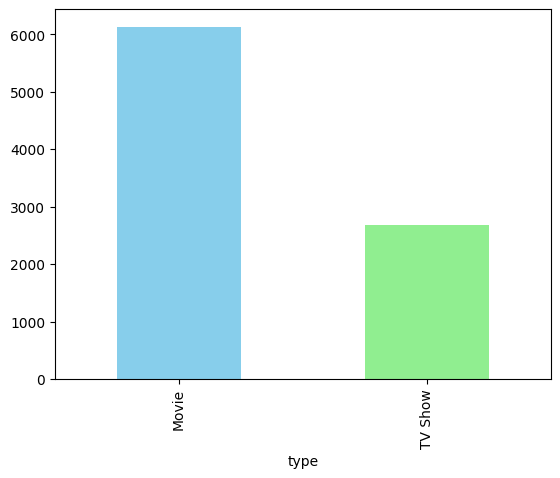

In [17]:
#Count of Movies vs TV Shows
df['type'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])


###  Top 10 Countries Producing Netflix Content

This horizontal bar chart highlights the top 10 countries contributing the most titles to Netflix.

**Observation:**  
The United States leads by a large margin, followed by India, the UK, and Canada. This reflects Netflix’s major content acquisition and production efforts in these regions.


<Axes: ylabel='country'>

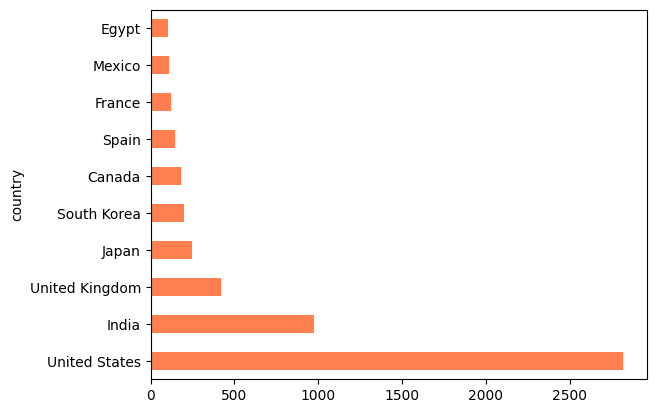

In [18]:
#Top Countries Producing Content
df['country'].value_counts().head(10).plot(kind='barh', color='coral')


###  Year-wise Content Addition

This chart displays the number of new titles added to Netflix each year.

**Observation:**  
There was a significant increase in content addition between 2017 and 2020, peaking around 2019. The drop after 2020 may reflect the impact of the COVID-19 pandemic on production and release schedules.


<Axes: xlabel='year_added'>

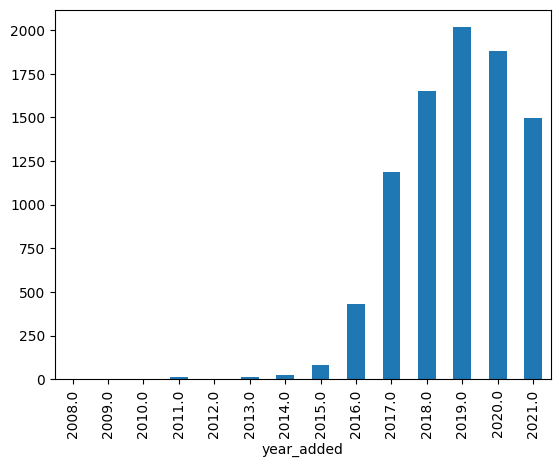

In [19]:
#Content Growth Over Years
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')
df['year_added'] = df['date_added'].dt.year

df['year_added'].value_counts().sort_index().plot(kind='bar')

###  Top 10 Genres on Netflix

We parsed and counted individual genres from the 'listed_in' column to find the most popular categories.

**Observation:**  
Dramas, Comedies, and Documentaries are the most frequent genres. This aligns with global viewing trends where dramatic storytelling and light-hearted entertainment dominate audience preferences.


<ipython-input-20-4170051731>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_df, x='Count', y='Genre', palette='coolwarm')


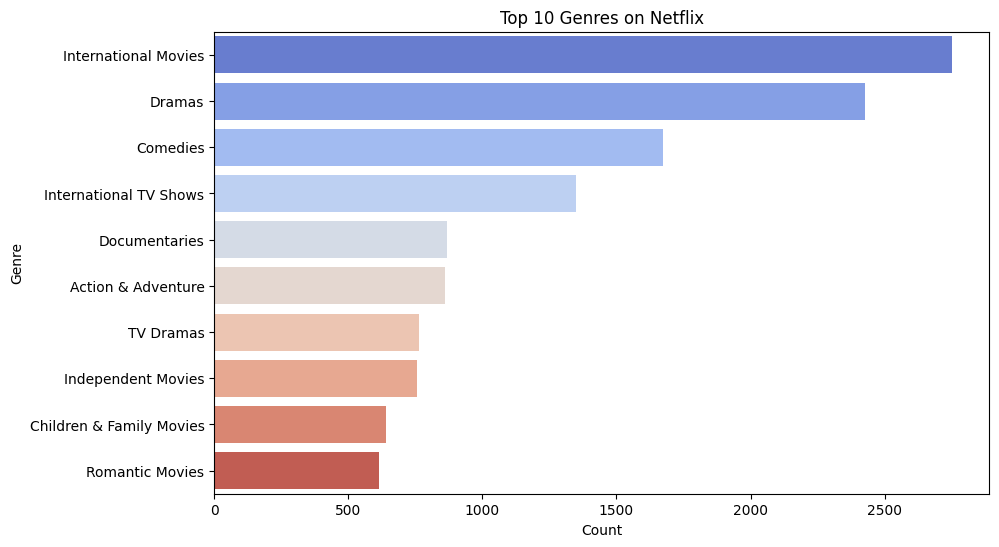

In [20]:
#Top 10 Genres
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Counter
genre_counter = Counter()

# Drop NaN and count each genre
df['listed_in'].dropna().apply(lambda x: genre_counter.update([genre.strip() for genre in x.split(',')]))

# Convert Counter to DataFrame
genre_df = pd.DataFrame(genre_counter.most_common(10), columns=['Genre', 'Count'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=genre_df, x='Count', y='Genre', palette='coolwarm')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()
